In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_data = pd.read_csv('data/train.csv')
input_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'This number is 7')

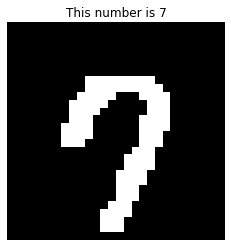

In [3]:
i = np.random.randint(len(input_data))

a_number = input_data.drop('label', axis=1).iloc[i].to_numpy(dtype='uint8').reshape(28, 28)
label = input_data['label'].iloc[i]

plt.axis('off')
plt.imshow(a_number, cmap='gray')
plt.title(f'This number is {label}')

In [4]:
y = input_data['label']
input_data.drop('label', axis=1, inplace=True)
X = input_data

In [5]:
y = pd.get_dummies(y)
y

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [6]:
from keras import Sequential
from keras.layers import Dense

In [7]:
classifier = Sequential()
classifier.add(Dense(units=600, kernel_initializer='uniform', activation='relu', input_dim=784))
classifier.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=200, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units= 10, kernel_initializer='uniform', activation='sigmoid'))

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 793,610
Trainable params: 793,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
classifier.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [10]:
classifier.fit(X, y, batch_size=10, epochs=10)

Epoch 1/10
4200/4200 [==============================] - 16s 2ms/step - loss: 0.1041 - accuracy: 0.3516
Epoch 2/10
4200/4200 [==============================] - 7s 2ms/step - loss: 0.0221 - accuracy: 0.8372
Epoch 3/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0087 - accuracy: 0.9516
Epoch 4/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0063 - accuracy: 0.9651
Epoch 5/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0050 - accuracy: 0.9722
Epoch 6/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0041 - accuracy: 0.9782
Epoch 7/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0035 - accuracy: 0.9819
Epoch 8/10
4200/4200 [==============================] - 7s 2ms/step - loss: 0.0028 - accuracy: 0.9852
Epoch 9/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.0025 - accuracy: 0.9862
Epoch 10/10
4200/4200 [==============================] - 8s 2ms/step - loss: 0.00

In [11]:
test_data = pd.read_csv('data/test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_pred = classifier.predict(test_data)

Text(0.5, 1.0, 'The predicted label for this number is 2')

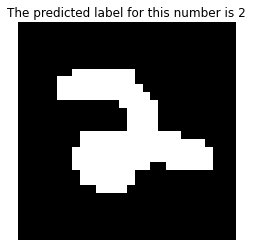

In [13]:
i = np.random.randint(len(test_data))

a_number = test_data.iloc[i].to_numpy(dtype='uint8').reshape(28, 28)
label = y_pred[i].argmax()

plt.axis('off')
plt.imshow(a_number, cmap='gray')
plt.title(f'The predicted label for this number is {label}')